In [1]:
import os

db_file = os.path.abspath("db.json")

In [2]:
from pymatgen import MPRester

mpr = MPRester()

struct_si = mpr.get_structure_by_material_id("mp-149")

In [3]:
from atomate.vasp.fireworks import OptimizeFW

fw1 = OptimizeFW(struct_si, vasp_cmd=None, db_file=db_file)

for task in fw1.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [4]:
from atomate.vasp.fireworks import StaticFW

fw2 = StaticFW(struct_si, vasp_cmd=None, db_file=db_file, parents=[fw1])

for task in fw2.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspStaticFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [5]:
from atomate.vasp.fireworks import NonSCFFW

fw3 = NonSCFFW(struct_si, vasp_cmd=None, db_file=db_file, 
               parents=[fw2], mode="uniform")

for task in fw3.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspNSCFFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [6]:
fw4 = NonSCFFW(struct_si, vasp_cmd=None, db_file=db_file, 
               parents=[fw2], mode="line")

for task in fw4.tasks:
    print(task.fw_name)

{{atomate.vasp.firetasks.glue_tasks.CopyVaspOutputs}}
{{atomate.vasp.firetasks.write_inputs.WriteVaspNSCFFromPrev}}
{{atomate.vasp.firetasks.run_calc.RunVaspCustodian}}
{{atomate.common.firetasks.glue_tasks.PassCalcLocs}}
{{atomate.vasp.firetasks.parse_outputs.VaspToDb}}


In [7]:
from fireworks import Workflow

fws = [fw1, fw2, fw3, fw4]

wf = Workflow(fws)

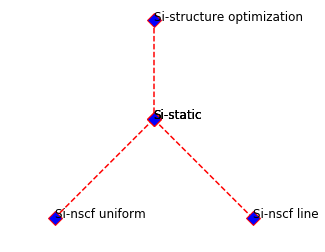

In [8]:
%matplotlib inline
from fireworks.utilities.fw_utilities import plot_wf

plot_wf(wf)

In [9]:
from helper_functions import electronic_structure_simulator

wf = electronic_structure_simulator(wf, ref_dir="~/workshop_ref_files/electronic_structure")

In [10]:
from fireworks import LaunchPad

lp = LaunchPad()
lp.reset("", require_password=False)

2017-08-08 16:51:29,910 INFO Performing db tune-up
2017-08-08 16:51:29,922 INFO LaunchPad was RESET.


In [11]:
lp.add_wf(wf)

2017-08-08 16:51:30,094 INFO Added a workflow. id_map: {-4: 1, -3: 2, -2: 3, -1: 4}


{-4: 1, -3: 2, -2: 3, -1: 4}

In [12]:
from fireworks import FWorker
from fireworks.core.rocket_launcher import rapidfire

rapidfire(lp)

2017-08-08 16:51:30,271 INFO Created new dir /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-08-23-51-30-271513
2017-08-08 16:51:30,272 INFO Launching Rocket
2017-08-08 16:51:30,296 INFO RUNNING fw_id: 4 in directory: /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-08-23-51-30-271513
2017-08-08 16:51:30,306 INFO Task started: {{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}}.
2017-08-08 16:51:30,316 INFO Task completed: {{atomate.vasp.firetasks.write_inputs.WriteVaspFromIOSet}} 
2017-08-08 16:51:30,321 INFO Task started: {{atomate.vasp.firetasks.run_calc.RunVaspFake}}.
2017-08-08 16:51:30,346 INFO atomate.vasp.firetasks.run_calc RunVaspFake: verified inputs successfully
2017-08-08 16:51:30,357 INFO atomate.vasp.firetasks.run_calc RunVaspFake: ran fake VASP, generated outputs
2017-08-08 16:51:30,358 INFO Task completed: {{atomate.vasp.firetasks.run_calc.RunVaspFake}} 
2017-08-08 16:51:30,362 INFO Task started: {{atomate.common.firetasks.glue_ta

2017-08-08 16:51:35,764 INFO atomate.vasp.firetasks.run_calc RunVaspFake: verified inputs successfully
2017-08-08 16:51:35,776 INFO atomate.vasp.firetasks.run_calc RunVaspFake: ran fake VASP, generated outputs
2017-08-08 16:51:35,779 INFO Task completed: {{atomate.vasp.firetasks.run_calc.RunVaspFake}} 
2017-08-08 16:51:35,789 INFO Task started: {{atomate.common.firetasks.glue_tasks.PassCalcLocs}}.
2017-08-08 16:51:35,790 INFO Task completed: {{atomate.common.firetasks.glue_tasks.PassCalcLocs}} 
2017-08-08 16:51:35,797 INFO Task started: {{atomate.vasp.firetasks.parse_outputs.VaspToDb}}.
2017-08-08 16:51:35,798 INFO atomate.vasp.firetasks.parse_outputs PARSING DIRECTORY: /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-08-23-51-33-631897
2017-08-08 16:51:35,803 INFO atomate.vasp.drones Getting task doc for base dir :/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-08-23-51-33-631897


/home/km/Software/matproj/pymatgen/pymatgen/symmetry/bandstructure.py:60: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


2017-08-08 16:51:36,108 INFO atomate.vasp.drones Post-processing dir:/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-08-23-51-33-631897
2017-08-08 16:51:36,109 WARNING atomate.vasp.drones Transformations file does not exist.
2017-08-08 16:51:36,122 INFO atomate.vasp.drones Post-processed /home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-08-23-51-33-631897
2017-08-08 16:51:36,155 INFO atomate.utils.database Inserting 5727:/home/km/Software/matproj/workshop-2017/Atomate/launcher_2017-08-08-23-51-33-631897 with taskid = 34
2017-08-08 16:51:36,171 INFO atomate.vasp.firetasks.parse_outputs Finished parsing with task_id: 34
2017-08-08 16:51:36,174 INFO Task completed: {{atomate.vasp.firetasks.parse_outputs.VaspToDb}} 
2017-08-08 16:51:36,196 INFO Rocket finished


In [13]:
from atomate.vasp.database import VaspCalcDb

vasp_db = VaspCalcDb()

In [14]:
from helper_functions import get_task_id

dos_task_id = get_task_id(lp, "Si-nscf uniform")
bs_task_id = get_task_id(lp, "Si-nscf line")
print(dos_task_id, bs_task_id)

33 34


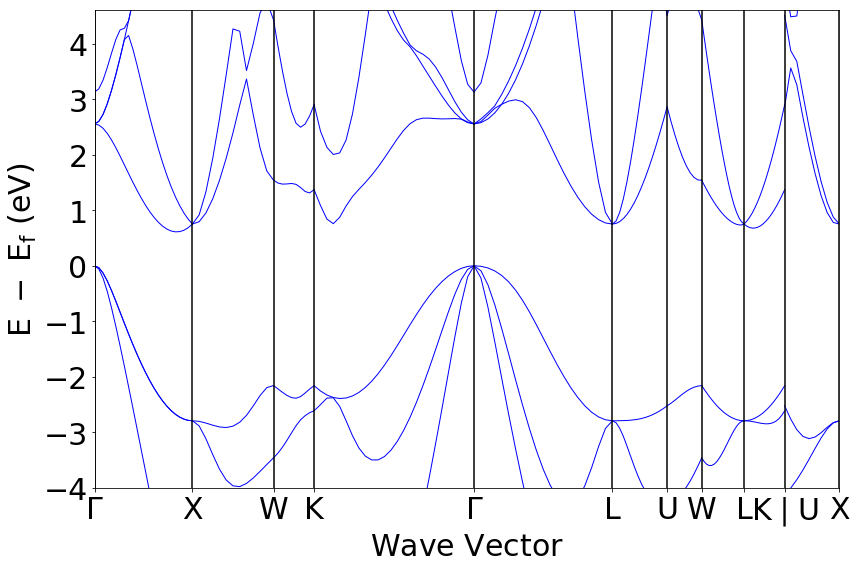

In [15]:
from pymatgen.electronic_structure.plotter import BSPlotter

bs = vasp_db.get_band_structure(bs_task_id)

plotter = BSPlotter(bs)
plt = plotter.get_plot()
plt.show()

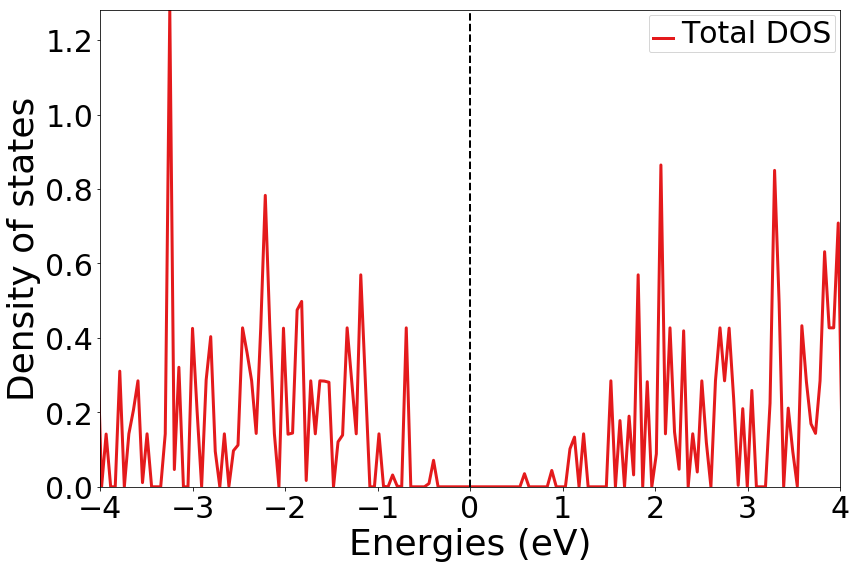

In [16]:
from pymatgen.electronic_structure.plotter import DosPlotter

dos = vasp_db.get_dos(dos_task_id)

plotter = DosPlotter()
plotter.add_dos("Total DOS", dos)
plt = plotter.get_plot(xlim=[-4,4])
plt.show()